<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/HANI/library_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7: Comparison Between Libraries
| Name                                     | Matrix Number | Task |
| :---------------------------------------- | :-------------: | ------------- |
| ALYA BALQISS BINTI AZAHAR | A21EC0158 | Pandas |
| MUHAMMAD IQMAL BIN SIS | A21EC0080 | Dask |
| NADIA SYAFIQAH BINTI ZULKIPLI | A21EC0098 | Modin |
| MUHAMMAD HARITH HAKIM BIN OTHMAN | A21EC0205 | Comparison & Summarization |

## **1. Data Selection**
The dataset encompasses property sales records starting from January 1995 up to the most recent monthly data available. It includes diverse transaction types, spanning from residential to commercial properties, offering a comprehensive perspective on the real estate market in England and Wales.

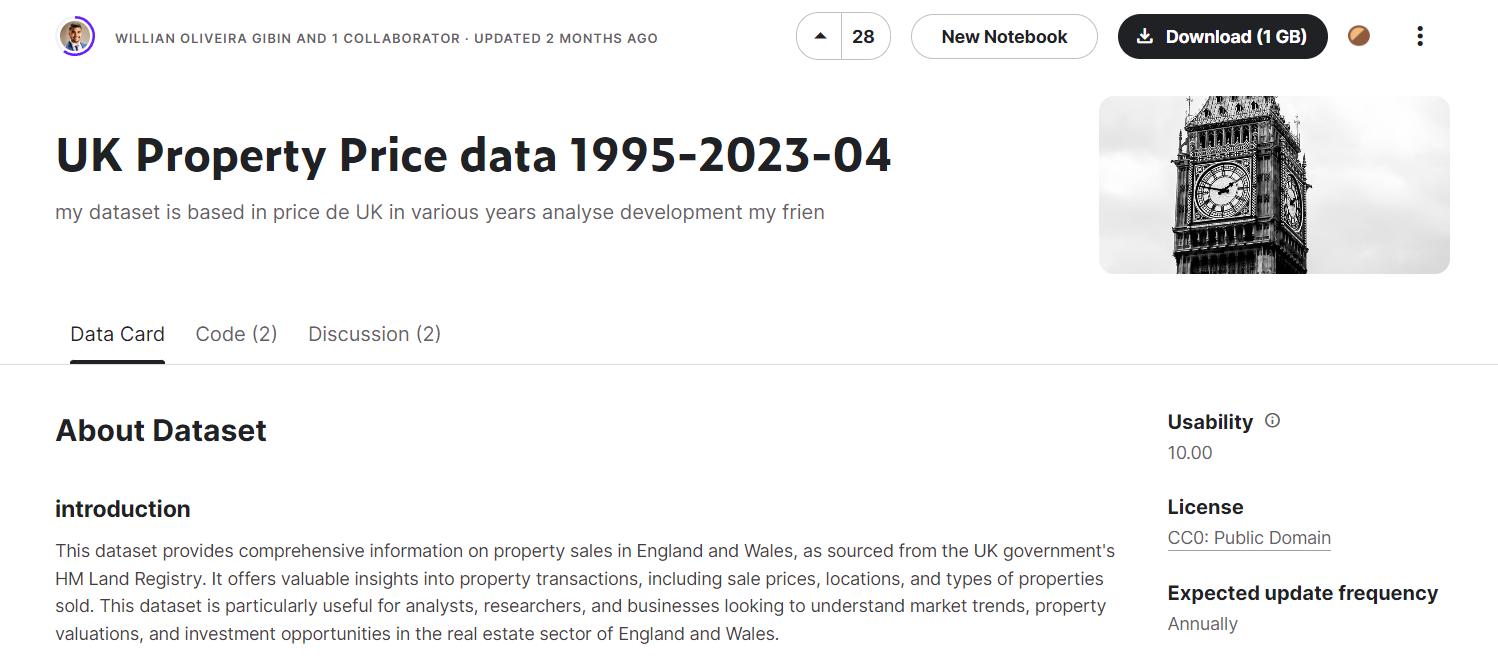

## **2. Load the Dataset**

1. Import libraries

In [ ]:
from  google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alyabalqiss","key":"499ea417c14b12ac079d5239325e8609"}'}

2. Upload dataset using Kaggle API

In [ ]:
!pip install kaggle # 1. Install the Kaggle Package
!mkdir -p ~/.kaggle # 2. Create a Kaggle Directory
!cp kaggle.json ~/.kaggle/ #3. Upload the Kaggle API Token
!chmod 600 ~/.kaggle/kaggle.json #4. Set File Permission

3. Install time measurement extension

In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.4 MB/s eta 0:00:00
time: 444 µs (started: 2023-12-25 15:25:53 +00:00)


4. Download the dataset

In [ ]:
!kaggle datasets download willianoliveiragibin/uk-property-price-data-1995-2023-04

 99% 1.34G/1.36G [00:17<00:00, 71.2MB/s]
100% 1.36G/1.36G [00:17<00:00, 81.7MB/s]
time: 19.3 s (started: 2023-12-25 15:26:13 +00:00)


5. Unzip the downloaded dataset

In [ ]:
!unzip uk-property-price-data-1995-2023-04.zip

Archive:  uk-property-price-data-1995-2023-04.zip
  inflating: 202304.csv              
time: 58.5 s (started: 2023-12-25 15:26:43 +00:00)


## **3. Big Data Operations**
Big data operations encompass the management and analysis of extensive data sets to derive valuable insights. In this specific case, the focus was on executing essential data preprocessing tasks.

These included data sampling to extract representative subsets, optimizing data types to enhance storage and processing efficiency, eliminating missing values to maintain data integrity, removing duplicates for increased accuracy, and selectively dropping columns to streamline the dataset.

These crucial actions are fundamental in preparing large datasets for analysis, facilitating the extraction of meaningful conclusions and supporting informed decision-making processes.

### 3.1 Data Sampling
The initial step involves data sampling because of the dataset's extensive size, totaling 4GB of data and 28.3 million rows. Attempting to read the dataset in its entirety leads to a Google Colab session crash. Therefore, it was determined to sample 10% of the data for analysis.

1. Import necessary libraries

In [ ]:
import os
import time
import pandas as pd
import random
import psutil
import sys  # For object size

2. Perform data sampling

In [ ]:
# Measure the start time
start_time = time.time()

filename = "202304.csv"

# Count the total number of rows in the CSV file
total_rows = sum(1 for line in open(filename)) - 1

# Sample size of 10%
sample_size = total_rows // 10

# Calculate the rows to skip for the sample
skip = sorted(random.sample(range(1, total_rows + 1), total_rows - sample_size))

# Read the CSV file with skipping non-sample rows
df = pd.read_csv(filename, skiprows=skip)

3. Calculate measurements

In [ ]:
# Caculate measurements
final_file_size = os.path.getsize(filename) / (1024 ** 2)  # File size in MB
computation_time = time.time() - start_time  # Computation time in seconds

process = psutil.Process(os.getpid()) # Final memory usage in MB
final_memory = process.memory_info().rss / (1024 ** 2)

4. Display the measurements

In [ ]:
print(f"File Size after Sampling: {final_file_size:.2f} MB")
print(f"Computation Time: {computation_time:.2f} seconds")
print(f"Memory Usage after Sampling: {final_memory:.2f} MB")

File Size after Sampling: 4714.51 MB
Computation Time: 172.09 seconds
Memory Usage after Sampling: 2506.44 MB


5. Display the first few rows of the dataframe

In [ ]:
df.head()

,{F887F88E-7D15-4415-804E-52EAC2F10958},70000,1995-07-07 00:00,MK15 9HP,D,N,F,31,Unnamed: 8,ALDRICH DRIVE,WILLEN,MILTON KEYNES,MILTON KEYNES.1,MILTON KEYNES.2,A,A.1
0,{444D34D7-9BA6-43A7-B695-4F48980E0176},51000,1995-06-28 00:00,DY5 1SA,S,N,F,59,NaN,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A,A
1,{748F870E-C337-4015-B5A3-4F499C6DDB0E},74000,1995-01-12 00:00,RH2 9NF,F,Y,L,"SOMERS PLACE, 83 - 85",FLAT 21,REIGATE HILL,REIGATE,REIGATE,REIGATE AND BANSTEAD,SURREY,A,A
2,{D5E86B66-DF72-489A-8B1B-4F49AA3AEC98},60000,1995-12-21 00:00,IG1 1PP,T,N,F,209,NaN,HAMPTON ROAD,ILFORD,ILFORD,REDBRIDGE,GREATER LONDON,A,A
3,{E58774C2-3011-484A-B631-5A06F3FB5BC9},102500,1995-09-28 00:00,NG2 6RP,D,Y,F,9,NaN,THIRLMERE,WEST BRIDGFORD,NOTTINGHAM,RUSHCLIFFE,NOTTINGHAMSHIRE,A,A
4,{21C18B10-142D-447D-A768-52EBD8EC3080},67000,1995-09-26 00:00,ST3 7UP,D,N,F,16,NaN,SEATON CLOSE,STOKE-ON-TRENT,STOKE-ON-TRENT,STOKE-ON-TRENT,STOKE-ON-TRENT,A,A




> Observably, the DataFrame does not include headers for its columns. Therefore, it is necessary to add headers by referencing the information provided on the Kaggle website.


6. Add column names for headers

In [ ]:
# Define your column names for header
column_names = ['Transaction Unique Identifier',
                'Price', 'Transfer Date', 'Postcode', 'Property Type', 'Old/New',
                'Duration', 'PAON', 'SAON', 'Street', 'Locality', 'Town/City', 'District',
                'County', 'PPDCategory Type', 'Record Status - Monthly File Only']

# Assign column names to the dataframe
df.columns = column_names

7. Display the updated DataFrame

In [ ]:
df.head()

,Transaction Unique Identifier,Price,Transfer Date,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory Type,Record Status - Monthly File Only
0,{444D34D7-9BA6-43A7-B695-4F48980E0176},51000,1995-06-28 00:00,DY5 1SA,S,N,F,59,NaN,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A,A
1,{748F870E-C337-4015-B5A3-4F499C6DDB0E},74000,1995-01-12 00:00,RH2 9NF,F,Y,L,"SOMERS PLACE, 83 - 85",FLAT 21,REIGATE HILL,REIGATE,REIGATE,REIGATE AND BANSTEAD,SURREY,A,A
2,{D5E86B66-DF72-489A-8B1B-4F49AA3AEC98},60000,1995-12-21 00:00,IG1 1PP,T,N,F,209,NaN,HAMPTON ROAD,ILFORD,ILFORD,REDBRIDGE,GREATER LONDON,A,A
3,{E58774C2-3011-484A-B631-5A06F3FB5BC9},102500,1995-09-28 00:00,NG2 6RP,D,Y,F,9,NaN,THIRLMERE,WEST BRIDGFORD,NOTTINGHAM,RUSHCLIFFE,NOTTINGHAMSHIRE,A,A
4,{21C18B10-142D-447D-A768-52EBD8EC3080},67000,1995-09-26 00:00,ST3 7UP,D,N,F,16,NaN,SEATON CLOSE,STOKE-ON-TRENT,STOKE-ON-TRENT,STOKE-ON-TRENT,STOKE-ON-TRENT,A,A


### 3.2 Optimizing Data Types
Optimizing data types is a crucial step in data management aimed at enhancing the efficiency of data storage and processing. This process involves strategically selecting the most suitable data formats to represent information accurately while minimizing memory usage

1. Change the datatypes to a suitable format

In [ ]:
# Measure the start time
start_time = time.time()

# Define the data types for each column based on optimization
data_types = {
    'Transaction Unique Identifier': 'string',
    'Price': 'float32',
    'Transfer Date': 'datetime64',
    'Postcode': 'string',
    'Property Type': 'category',
    'Old/New': 'category',
    'Duration': 'category',
    'PAON': 'string',
    'SAON': 'string',
    'Street': 'string',
    'Locality': 'string',
    'Town/City': 'string',
    'District': 'string',
    'County': 'string',
    'PPDCategory Type': 'category',
    'Record Status - Monthly File Only': 'category'
}

# Convert columns to optimized data types
df = df.astype(data_types)

# Display information after sampling
final_file_size = os.path.getsize(filename) / (1024 ** 2)  # Final file size in MB
computation_time = time.time() - start_time  # Computation time in seconds

# Memory usage
memory_usage = psutil.Process(os.getpid()).memory_info().rss / (1024 ** 2)  # Memory usage in MB

# Display DataFrame(df) object size
df_size = sys.getsizeof(df) / (1024 ** 2)  # Convert to megabytes

2. Display measurements after optimizing datatypes

In [ ]:
# Print results
print(f"File Size: {final_file_size:.2f} MB")
print(f"Computation Time: {computation_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")
print(f"DataFrame Size: {df_size:.2f} MB")

File Size: 4714.51 MB
Computation Time: 1.87 seconds
Memory Usage: 2529.00 MB
DataFrame Size: 1641.59 MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827622 entries, 0 to 2827621
Data columns (total 16 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Transaction Unique Identifier      string        
 1   Price                              float32       
 2   Transfer Date                      datetime64[ns]
 3   Postcode                           string        
 4   Property Type                      category      
 5   Old/New                            category      
 6   Duration                           category      
 7   PAON                               string        
 8   SAON                               string        
 9   Street                             string        
 10  Locality                           string        
 11  Town/City                          string        
 12  District                           string        
 13  County                             string        
 14  PP

### 3.3 Drop Missing Values
Dropping missing values is an essential procedure in data preprocessing that involves eliminating instances within a dataset where information or values are absent or incomplete. This process ensures the integrity and reliability of the dataset for subsequent analysis or modeling.

1. Drop missing values

In [ ]:
# Record the start time
start_time = time.time()

# Calculate memory usage before dropping missing values
memory_before = df.memory_usage().sum() / (1024 ** 2)  # Convert to megabytes

# Drop rows with missing values across all columns
df.dropna(inplace=True)

# Calculate memory usage after dropping missing values
memory_after = df.memory_usage().sum() / (1024 ** 2)  # Convert to megabytes

# Record the end time
end_time = time.time()

# Calculate computation time
computation_time = end_time - start_time

# Get the file size of the DataFrame after dropping missing values
file_size = os.path.getsize(filename) / (1024 ** 2)  # Convert to megabytes

2. Display measurements after dropping

In [ ]:
# Print results
print("Memory usage before: {:.2f} MB".format(memory_before))
print("Memory usage after: {:.2f} MB".format(memory_after))
print("File size after dropping missing values: {:.2f} MB".format(file_size))
print("Computation time: {:.2f} seconds".format(computation_time))
print("Shape of DataFrame after dropping missing values:", df.shape)

Memory usage before: 240.00 MB
Memory usage after: 14.36 MB
File size after dropping missing values: 4714.51 MB
Computation time: 1.53 seconds
Shape of DataFrame after dropping missing values: (155235, 16)


### 3.4 Drop Duplicate Values
Dropping duplicate values is a step in data cleaning and preparation, focusing on the identification and removal of identical records or entries within a dataset. This process aims to streamline data quality by eliminating redundant information, ensuring data accuracy, and maintaining the integrity of analyses or models.

1. Drop duplicate values

In [ ]:
# Record the start time
start_time = time.time()

# Calculate memory usage before dropping duplicates
memory_before = df.memory_usage().sum() / (1024 ** 2)  # Convert to megabytes

# Drop duplicate rows based on all columns
df.drop_duplicates(inplace=True)

# Calculate memory usage after dropping duplicates
memory_after = df.memory_usage().sum() / (1024 ** 2)  # Convert to megabytes

# Record the end time
end_time = time.time()

# Calculate computation time
computation_time = end_time - start_time

# Get the file size of the DataFrame after dropping duplicates
file_size = os.path.getsize(filename) / (1024 ** 2)  # Convert to megabytes

2. Display measurements after dropping

In [ ]:
# Print results
print("Memory usage before: {:.2f} MB".format(memory_before))
print("Memory usage after: {:.2f} MB".format(memory_after))
print("File size after dropping duplicates: {:.2f} MB".format(file_size))
print("Computation time: {:.2f} seconds".format(computation_time))
print("Shape of DataFrame after dropping duplicates:", df.shape)

Memory usage before: 14.36 MB
Memory usage after: 14.36 MB
File size after dropping duplicates: 4714.51 MB
Computation time: 0.66 seconds
Shape of DataFrame after dropping duplicates: (155235, 16)


### 3.5 Drop Columns
Dropping columns refers to the deliberate removal of specific attributes or variables from a dataset during data preprocessing. This process is aimed at refining the dataset by excluding columns that may not contribute significantly to the analysis, contain redundant or irrelevant information, or pose challenges.

In this scenario, the columns labeled **'SAON', 'Duration', 'PPDCategory Type'**, and **'Record Status - Monthly File Only'** were removed due to the absence of explanatory information on the Kaggle website. Owing to the lack of provided details, interpreting these columns became challenging, prompting their exclusion from the dataset.

1. Drop selected columns

In [ ]:
# Record the start time
start_time = time.time()

# Calculate memory usage before dropping specified columns
memory_before = df.memory_usage().sum() / (1024 ** 2)  # Convert to megabytes

# List of columns to drop
columns_drop = ['SAON', 'Duration', 'PPDCategory Type', 'Record Status - Monthly File Only']

# Drop the specified columns from the DataFrame
df.drop(columns=columns_drop, inplace=True)

# Calculate memory usage after dropping specified columns
memory_after = df.memory_usage().sum() / (1024 ** 2)  # Convert to megabytes

# Record the end time
end_time = time.time()

# Calculate computation time
computation_time = end_time - start_time

# Get the file size of the DataFrame after dropping specified columns
file_size = os.path.getsize(filename) / (1024 ** 2)  # Convert to megabytes

2. Display measurements after dropping

In [ ]:
# Print results
print("Memory usage before: {:.2f} MB".format(memory_before))
print("Memory usage after: {:.2f} MB".format(memory_after))
print("File size after dropping specified columns: {:.2f} MB".format(file_size))
print("Computation time: {:.2f} seconds".format(computation_time))
print("Shape of DataFrame after dropping specified columns:", df.shape)

Memory usage before: 14.36 MB
Memory usage after: 12.73 MB
File size after dropping specified columns: 4714.51 MB
Computation time: 0.01 seconds
Shape of DataFrame after dropping specified columns: (155235, 12)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155235 entries, 1 to 2827596
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Transaction Unique Identifier  155235 non-null  string        
 1   Price                          155235 non-null  float32       
 2   Transfer Date                  155235 non-null  datetime64[ns]
 3   Postcode                       155235 non-null  string        
 4   Property Type                  155235 non-null  category      
 5   Old/New                        155235 non-null  category      
 6   PAON                           155235 non-null  string        
 7   Street                         155235 non-null  string        
 8   Locality                       155235 non-null  string        
 9   Town/City                      155235 non-null  string        
 10  District                       155235 non-null  string        
 11 

## **4. Exploratory Data Analysis (EDA)**
Exploratory Data Analysis (EDA) is a significant approach that involves investigating and summarizing the main characteristics, patterns, and relationships within a dataset. Through visual and statistical methods, EDA aims to comprehend the structure of the data, identify key trends, anomalies, and insights, and generate hypotheses for further analysis. It helps in gaining a deeper understanding of the information contained in the dataset before applying more complex modeling or inferential techniques.

Import Necessary Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Statistical Measures for Numeric Values (Price)

In [ ]:
# Statistical measures
sum = df['Price'].sum()
mean = df['Price'].mean()
median = df['Price'].median()
first_quartile = df['Price'].quantile(0.25)
third_quartile = df['Price'].quantile(0.75)

# Display the results
print("\nStatistical Measures (Price)")
print()
print("Sum: ", sum)
print("Mean: ", mean)
print("Median: ", median)
print("First Quartile (Q1): ", first_quartile)
print("Third Quartile (Q3): ", third_quartile)
print()


Statistical Measures (Price)

Sum:  29360992000.0
Mean:  189139.0
Median:  140000.0
First Quartile (Q1):  85000.0
Third Quartile (Q3):  220000.0





> In this dataset, statistical analysis is conducted solely on numerical values, where the "Price" column stands as the only numerical variable. As a consequence, the scope for extracting and analyzing numerical data is notably restricted due to the categorical nature of the other columns in the dataset.

> The sum, mean, median, minimum, maximum, first quartile, and third quartile value are calculated.





2. Data Visualisations

> 2.1 Pie Chart on Distribution of Property Types

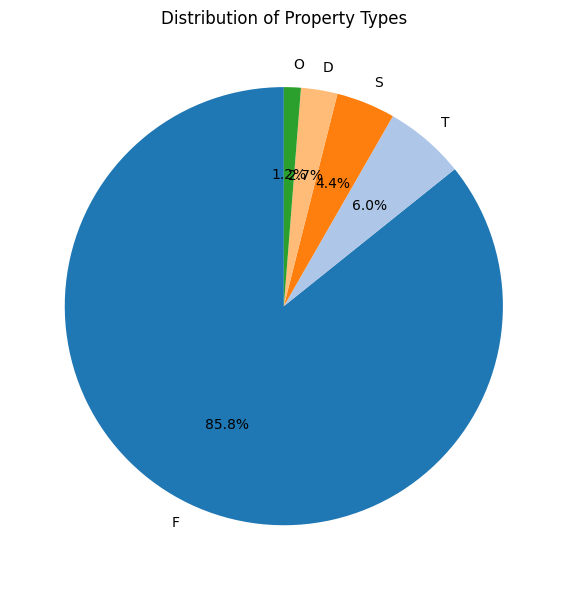

In [ ]:
# Calculate the count of each property type
property_type_count = df['Property Type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
property_type_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Distribution of Property Types')
plt.ylabel('')  # Remove y-axis label
plt.tight_layout()
plt.show()

The property type abbreviations typically stand for the following categories in real estate:

- F: Flat
- O: Other
- D: Detached (Refers to a standalone house)
- T: Terraced (Refers to a house that shares both side walls with other properties in a row)
- S: Semi-detached (Refers to a house that shares one side wall with another property)

The data indicates that 'F' property type, representing flats, dominates the property market in the UK, comprising a substantial percentage of 85.7%. Conversely, the 'O' category, encompassing various unspecified property types, represents a minimal proportion at 1.2%.

> 2.2 Comparison of New and Old Properties

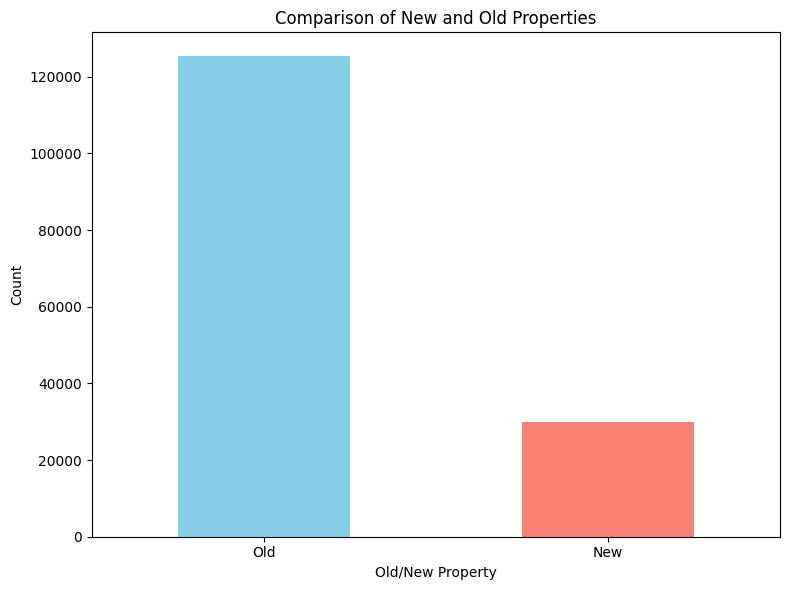

In [ ]:
# Group the data by 'Old/New' and count occurrences
new_old_counts = df['Old/New'].value_counts()

# Create a mapping for the labels
label_mapping = {'Y': 'New', 'N': 'Old'}

# Replace the labels in the index
new_old_counts.index = new_old_counts.index.map(label_mapping)

# Plotting the bar graph
plt.figure(figsize=(8, 6))
new_old_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Comparison of New and Old Properties')
plt.xlabel('Old/New Property')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()
plt.show()

The data illustrates a significant disparity in counts between Old and New properties, with Old properties numbering over 12,000 while New properties amount to approximately 3,000.

> 2.3 Transaction Count in Top 5 Localities

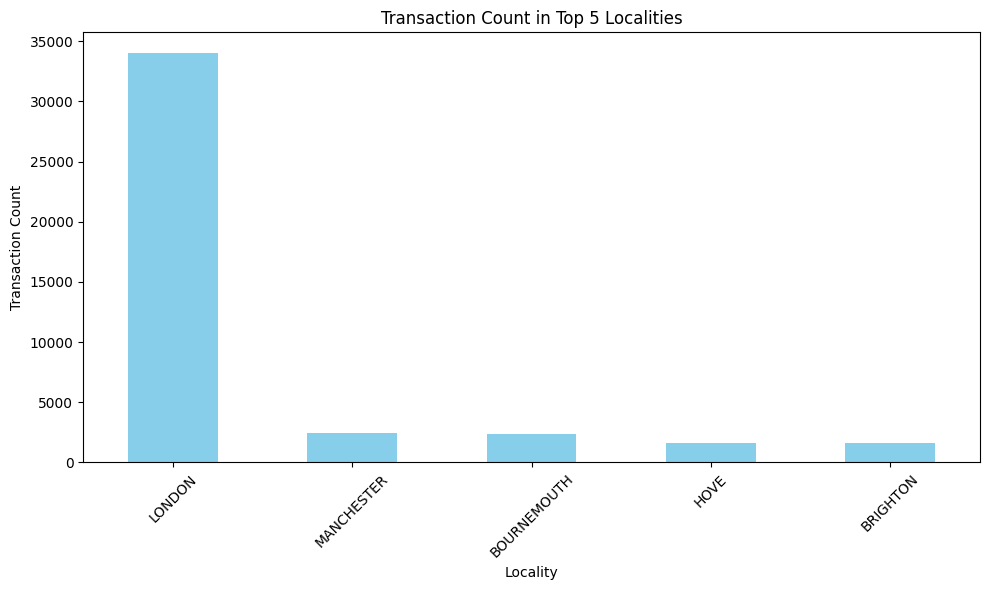

In [ ]:
# Get the top 5 localities based on transaction count
top_5_localities = df['Locality'].value_counts().head(5).index

# Filter the DataFrame for the top 5 localities
df_top_5_localities = df[df['Locality'].isin(top_5_localities)]

# Calculate transaction count for each locality
locality_transaction_count = df_top_5_localities['Locality'].value_counts()

# Plotting the bar chart for transaction count in top 5 localities
plt.figure(figsize=(10, 6))
locality_transaction_count.plot(kind='bar', color='skyblue')
plt.title('Transaction Count in Top 5 Localities')
plt.xlabel('Locality')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The visualization indicates that among the top 5 countries with the highest transaction counts—London, Bournemouth, Manchester, Brighton and Hove. London stands out prominently, registering approximately 34,000 transactions, significantly surpassing the others, each of which has transaction counts below 5,000.

## Questions about Dataset

Import necessary libraries for data visualisation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

1.  What is the trend or direction in the annual number of transactions over the given period in the dataset?

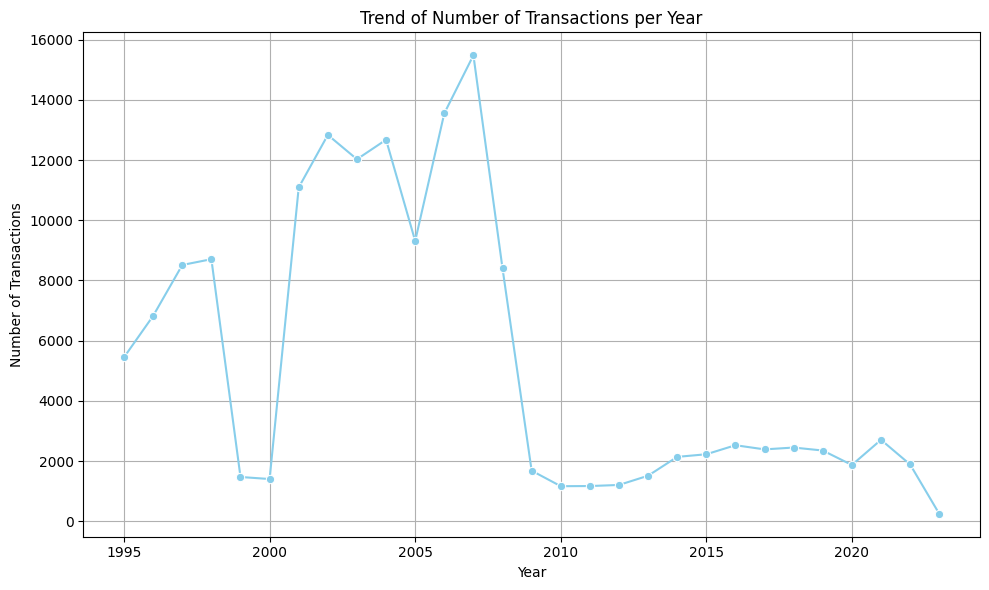

In [ ]:
# Extract the year from the 'Transfer Date' and create a new 'Year' column
df['Year'] = df['Transfer Date'].dt.year

# Group by year and count the number of transactions
transactions_per_year = df['Year'].value_counts().sort_index()

# Create a line plot for the trend of number of transactions per year using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=transactions_per_year.index, y=transactions_per_year.values, marker='o', color='skyblue')
plt.title('Trend of Number of Transactions per Year')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()

> **Answer:**
>>  The trend shows that the highest transaction records at 2005 - 2010 where the number of transactions are above 14,000. But, we can see that it plummeted aggresively from late 2005-2010 (possibly 2009) and reach the lowest point for 2005-2010 period which are lower than 2,000 transactions.

>>   The graph also shows that from year 2000, the number of transaction slowly building up until it reaches the highest point of transaction during mid 2005-2010 period.

>> The lowest transaction records are after year 2020, where it almost hit 0 in number of transactions. This might be due to the pandemic that has hit globally where it affect the economic as a whole.

2. What insights can be inferred about the variation in the ratio of new to old properties within the top 10 districts, considering the distribution of new and old properties in these specific areas?

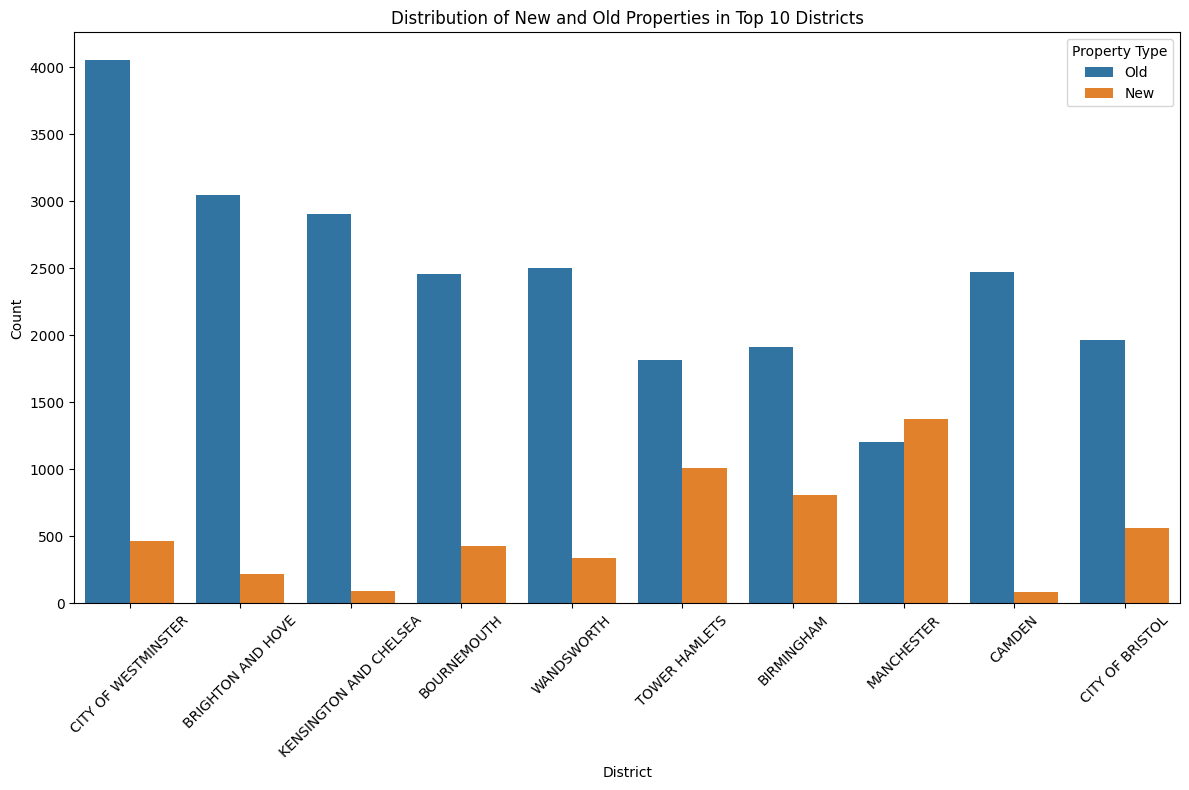

In [ ]:
# Get the top 10 districts based on the count of properties
top_10_districts = df['District'].value_counts().head(10).index

# Filter the DataFrame for the top 10 districts
df_top_10 = df[df['District'].isin(top_10_districts)]

# Create the count plot for new and old properties in the top 10 districts using Seaborn
plt.figure(figsize=(12, 8))
sns.countplot(x='District', hue='Old/New', data=df_top_10, order=top_10_districts)
plt.title('Distribution of New and Old Properties in Top 10 Districts')
plt.xlabel('District')
plt.ylabel('Count')

# Modifying the legend labels
plt.legend(title='Property Type', labels=['Old', 'New'])

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.tight_layout()
plt.show()

> **Answer**

>>  Based on all these 10 districts, the graph shows that old property type dominantly held all of the districts.

>> From these graph, it shows that City of WestMinster has the highest ol property type as well as one of the lowest new property type. It concludes that this place is less progressive and not one of the most focal point of development.

>> Manchester district hold the most balance between old and new property types. This shows that the district might have a balanced in terms of development.

3. Considering the dataset's **top 10 countie**s by property count, what patterns emerge in the distribution of property types across these counties?

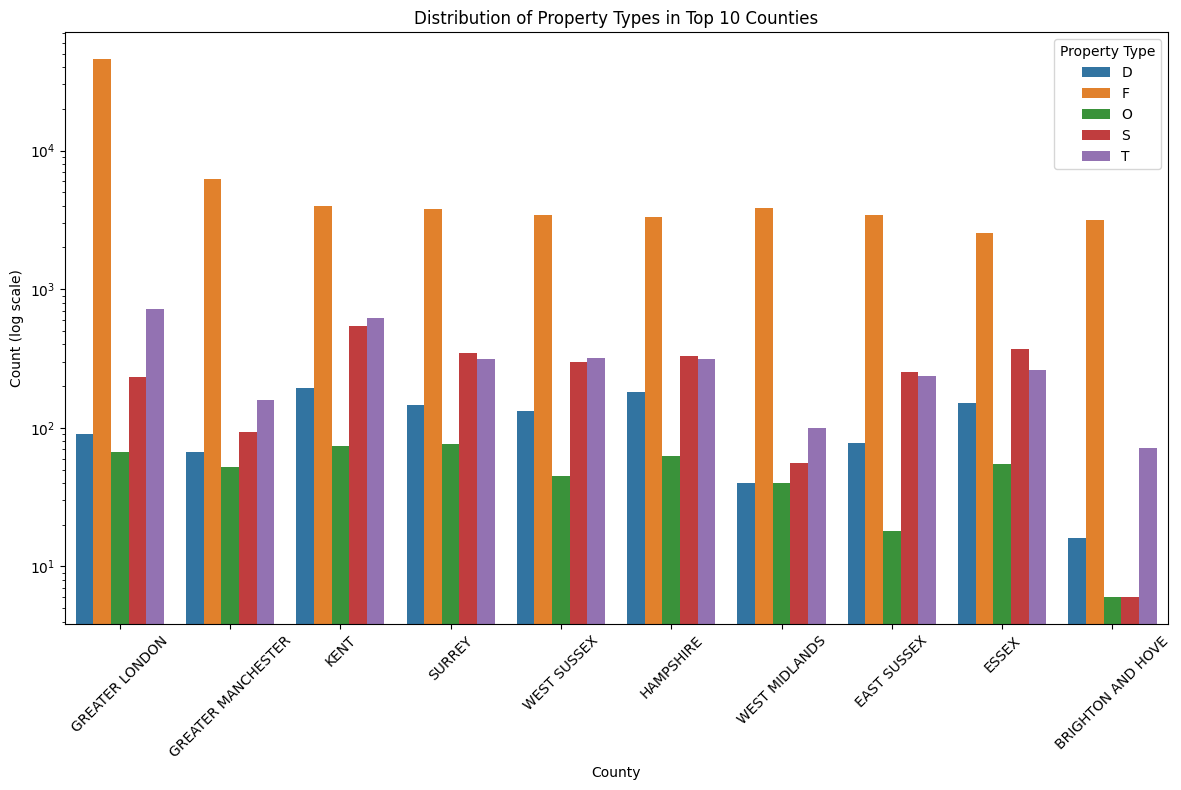

In [ ]:
# Get the top 10 counties based on the count of properties
top_10_counties = df['County'].value_counts().head(10).index

# Filter the DataFrame for the top 10 counties
df_top_10 = df[df['County'].isin(top_10_counties)]

# Create the count plot for property types in the top 10 counties using Seaborn
plt.figure(figsize=(12, 8))
sns.countplot(x='County', hue='Property Type', data=df_top_10, order=top_10_counties)
plt.title('Distribution of Property Types in Top 10 Counties')
plt.xlabel('County')
plt.ylabel('Count (log scale)')
plt.legend(title='Property Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary

# Set the y-axis to logarithmic scale for better visualization
plt.yscale('log')

plt.tight_layout()
plt.show()

> **Answer:**

>> The high number of Flat (F) properties in Greater London indicates significant urban development, reflecting the district's large population and advanced level of development.

>> Based on all the County, the trend shows that Semi-Detached (S) and Terrace (T) compete with almost the same values.

>> On the contrary, properties categorized as "Other" (O) have the lowest count across all counties. This scarcity can be attributed to the infrequency of distinct or customized property types, likely influenced by the need to accommodate the average income levels across various locations.

> Logarithmic scaling is utilised. In this scenarios, the data have a significant variation or has a few extremely high values (outliers), using a logarithmic scale allows for a clearer representation of the entire data range.





4. In the year 2005, what are the top 5 localities with the highest count of 'S' property types?

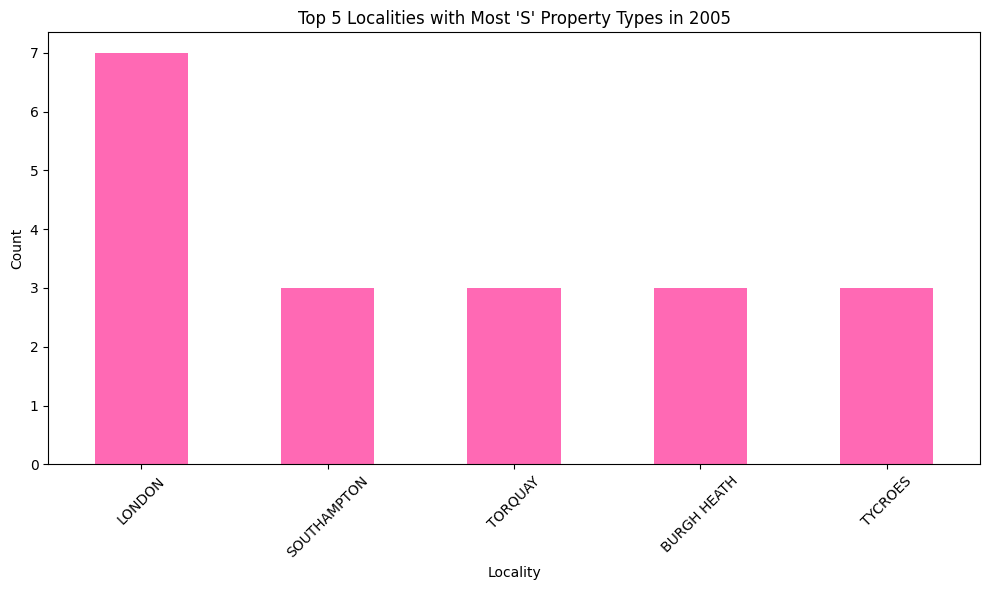

In [ ]:
# Filter data for the year 2005 and 'S' property type
data_2005_S = df[(df['Transfer Date'].dt.year == 2005) & (df['Property Type'] == 'S')]

# Get the top 5 localities with the most 'S' property types
top_5_localities_S = data_2005_S['Locality'].value_counts().head(5)

# Plotting a bar graph for top 5 localities with most 'S' property types in 2005
plt.figure(figsize=(10, 6))
top_5_localities_S.plot(kind='bar', color='hotpink')
plt.title('Top 5 Localities with Most \'S\' Property Types in 2005')
plt.xlabel('Locality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> **Answer:**

>> London has the highest count for Semi-Detached (S) property. This is because London is a developed place thus, the demand for Semi-Detached house also risen. Thus making the S property increases the most.

>> Starting from Ventnor to Bristol, we can see the data is smoothen or balanced because the demand is average for Semi-Detached house.

>> The mix of property types in different areas reflects the local lifestyle. Urban hubs like London favor flats for a dense population, while the others is less dense compared to the extreme data of London.


5. How does the average property price differ across top 10 districts?

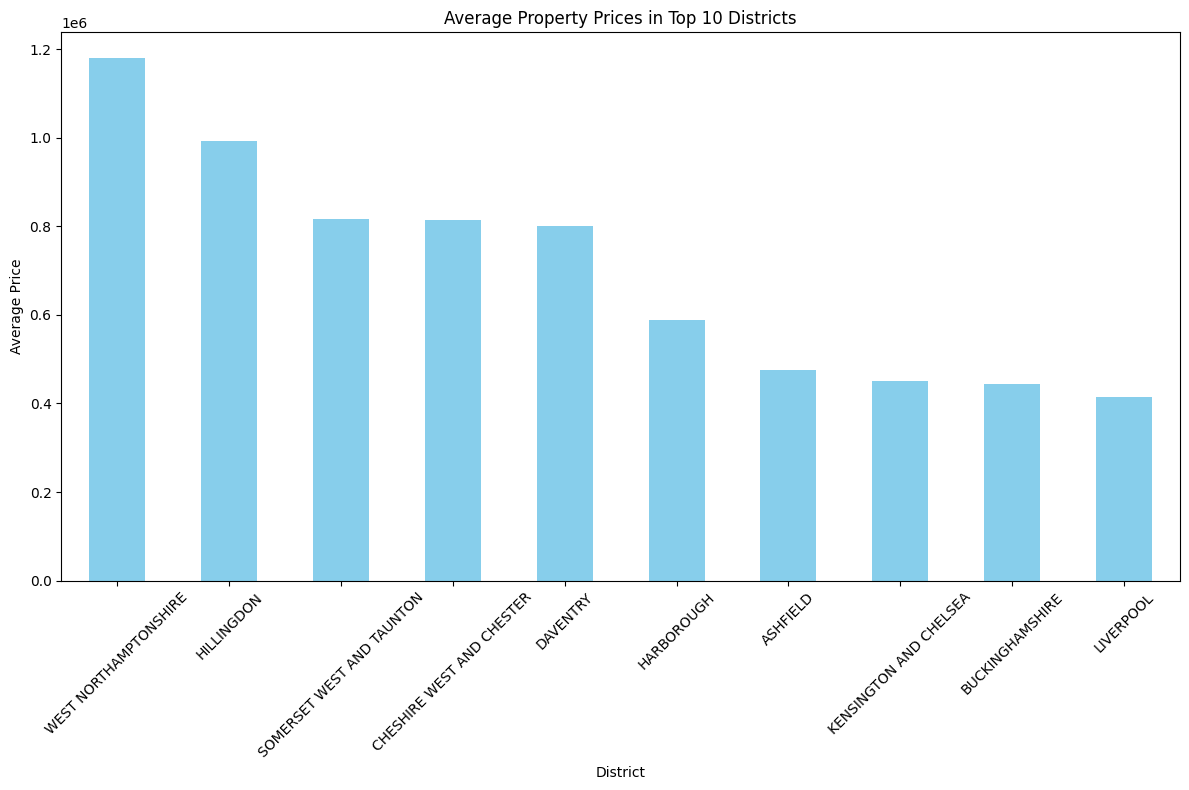

In [ ]:
# Calculate the mean property price for each district
mean_prices = df.groupby('District')['Price'].mean().sort_values(ascending=False).head(10)

# Plotting a bar graph for average property prices across top 10 districts
plt.figure(figsize=(12, 8))
mean_prices.plot(kind='bar', color='skyblue')
plt.title('Average Property Prices in Top 10 Districts')
plt.xlabel('District')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> **Answer:**

>> West Northamptonshire District has the highest average price for the property. From this data, it shows that this district is one of the

>> On the other end of the spectrum, Ashfield, Kensington and Chelsea, Buckinghamshire and Liverpool hold the lowest number of properties, and their counts are relatively similar. This observation suggests a potential low setting for these areas, contributing to their lower property numbers.